In [1]:
#knapscka GA
#Generation is a list of 3 elements [weights[], values[], max_weight] 
def run_simulation_GA_Knapsack(param=None):
    if param:
        paramaters = param
    else:
        paramaters = init_parameters(sim_total=1000,items_Amount=10,population_size=100,percentage_elitism = 0.1, prob_crossover = 0.7, prob_mutation = 0.1)
    world = init_world(items_Amount=paramaters[1])
    population = init_population(world, population_size=paramaters[2])
    log_file = init_log_file(world,paramaters)
    for a in range(paramaters[0]):
        log_file = log_values(log_file, a, population, world)
        selected_indices_pop = selection(population,world,per_selected=paramaters[3])
        new_pop = crossover(selected_indices_pop,population,world,prob_cross=paramaters[4])    
        population = mutation(new_pop,prob_mut=paramaters[5])  
    print('PARAMETERs',paramaters)
    print_population_evaluation(population,world)
    return log_file


In [2]:
import random
def init_world(items_Amount=10,max_i_weight=10,max_i_val=10,max_weight=30,seed=13579, sim_total = 10, proportional = True):    
    random.seed(seed)
    if proportional:              
        max_i_val = items_Amount
        max_i_weight = items_Amount
    items_weight = random.sample(range(0,max_i_weight),items_Amount)
    items_value = random.sample(range(0,max_i_val),items_Amount)
    #Make it scale with amount items, 0.7 is hardcoded, could be changed.
    max_weight = int(sum(items_weight)*0.7) if proportional else max_weight
    
    return [items_weight, items_value, max_weight]

In [3]:
def init_population(world, population_size = 10):
    size = len(world[0])#Get amount of genes per individual
    genes = [[random.choice([0,1]) for j in range(size)]  for i in range(population_size)]
    return genes

In [4]:
def init_parameters(sim_total=1000,items_Amount=10, population_size=100,percentage_elitism = 0.1, prob_crossover = 0.7, prob_mutation = 0.05):
    return [sim_total,items_Amount,population_size, percentage_elitism, prob_crossover, prob_mutation]

def init_log_file(world,parameters):
    log_file = [{},world,parameters]
    return log_file
def log_values(log_file, sim_index,current_population,world, light_logs =True):
    best_fitness, best_individual = get_best_fitness(current_population,world)
    diversity_amount = len(set(tuple(gen) for gen in current_population))
    if light_logs:
        simulation = [sim_index, best_individual,best_fitness, diversity_amount]
    else:
        simulation = [sim_index, current_population.copy(),best_fitness, diversity_amount]
    log_file[0][sim_index]=simulation
    # print(log_file)
    return log_file

def get_best_fitness(population,world):
    values = [evaluation(gen,world) for gen in population]
    sorted_indices = sorted(range(len(values)), key=lambda i:values[i],reverse=True)
    ind = population[sorted_indices[0]]
    best_fitness = evaluation(ind, world)
    return best_fitness, ind

In [5]:
def plot_fitness_experiment(experiment):
    iteration_counts = experiment[0].keys()
    fitness_experiment = [experiment[0][index][-2] for index in iteration_counts]
    diversity_experiment = [experiment[0][index][-1] for index in iteration_counts]
    return fitness_experiment,diversity_experiment

In [6]:
import matplotlib.pyplot as plt
def plot_experiments(experiments):
    keys_experiments = experiments.keys()
    count =0
    current_items_amount = -1
    current_population_amount = -1
    current_elitism = -1
    fitness = []
    diversity = []
    for k in keys_experiments:
        if k == 'LAST':
            break
        param = experiments[k][-1]      
        if param[2] != current_population_amount or param[3] != current_elitism or param[1] != current_items_amount:
            fitness.append([])
            diversity.append([])         
        
        current_items_amount = param[1]
        current_population_amount = param[2]
        current_elitism = param[3]
        print('Paramenters: ',param)

        f, d = plot_fitness_experiment(experiments[k])
        fitness[-1].append(f)
        diversity[-1].append(d)
    import numpy as np
    import seaborn as sns
    labels = ['Crossover: 0.7, Mutation: 0.05','Crossover: 0.7, Mutation: 0.1','Crossover: 0.9, Mutation: 0.05','Crossover: 0.9, Mutation: 0.1']
    items_amount = [10,15,30]
    pop_size = [10,50,100]    
    elitism_values = ['10%','20%']
    nodes_count = -1
    pop_count = -1
    e_count = -1
    for j in range(len(fitness)):
        f, (ax1, ax2) = plt.subplots(2,1,figsize=(15,15))
        nodes_count = nodes_count+1 if j%6 == 0 else nodes_count 
        e_count = (e_count+1)%2 if j%3 ==0 else e_count
        for i in range(len(fitness[j])):        
            pop_count = (pop_count+1)%3 if i%8 == 0 else pop_count
            title = 'Graph ('+str(j) +'). Items amount '+str(items_amount[nodes_count])+', Population is '+str(pop_size[pop_count]) + ', Elitism is ' + elitism_values[e_count]
            ax1.plot(fitness[j][i], label=labels[i])
            ax1.legend()
            ax1.set_ylabel('Value/Fitness (Higher is better)')
            ax1.set_xlabel('Generations/Iterations')                  
            ax1.set_title(title+'. Fitness change over time ')
        for i in range(len(diversity[j])):
            ax2.plot(diversity[j][i],label=labels[i])
            ax2.legend()
            ax2.set_ylabel('Unique amount of genes')
            ax2.set_xlabel('Generations/Iterations')
            ax2.set_title(title +'. Gene diversity change over time')
        f.savefig('Knapsack_graphs/'+title+'.png',bbox_inches ='tight')


In [7]:
def create_experiments():
    #Simulation count
    simulation_total = 1000
    items = [10,15,30]
    population_size = [10,50,100]
    # elitism = [0.1,0.2,0.6]
    # crossover = [0.5,0.7,0.9]
    # mutation = [0.05,0.1,0.15]
    elitism = [0.1,0.2]
    crossover = [0.7,0.9]
    mutation = [0.5,0.1]
    experiments = {}
    count = 0
    for c in items:
        for p in population_size:
            for e in elitism:
                for csvr in crossover:
                    for m in mutation:
                        experiments[count] = run_simulation_GA_Knapsack(param = init_parameters(sim_total=simulation_total,items_Amount=c,population_size=p,percentage_elitism = e, prob_crossover =csvr, prob_mutation = m))
                        count += 1 
    # print(experiments)    
    # experiments['LAST'] = True                
    import json
    # huh = json.dumps(experiments)
    # with open('TSP_experiments.json', 'w') as outfile:
    #     outfile.write(huh)
    with open('Knapsack_experiments_'+str(simulation_total)+'.json', 'w') as outfile:
        json.dump(experiments,outfile)
    return experiments

In [8]:
def evaluation(genes, world):
    i_weights, i_values, max_weight = world
    weights = get_from_genes_index(genes,i_weights)
    weight_sum = sum(weights)
    #If weights are more than max_weight then discard
    value_sum = -1 if weight_sum > max_weight else sum(get_from_genes_index(genes,i_values))
    return value_sum 

In [9]:
#Some ideas influenced by the following links, no code was copied.
#https://stackoverflow.com/questions/12787650/finding-the-index-of-n-biggest-elements-in-python-array-list-efficiently
#https://cs.stackexchange.com/questions/85318/does-crossover-take-the-parents-or-the-offsprings-how-to-select-parents-with-li
#https://medium.com/koderunners/genetic-algorithm-part-3-knapsack-problem-b59035ddd1d6
def selection(pop, world, sel_type = 'elitism',per_selected = 0.4):
    amount_elite= int(len(pop)*per_selected) 
    values = [evaluation(gen,world) for gen in pop]
    # print(values)
    sorted_genes_from_pop = sorted(range(len(values)), key=lambda i:values[i],reverse=True)
    # print(sorted_genes_from_pop)
    selected_indices_pop = sorted_genes_from_pop[:amount_elite]
    # print('selected',selected_indices_pop)
    return selected_indices_pop

def crossover(pop_indices, pop,  world, prob_cross = 0.8, prob_gene = 0.5):
    amount = len(pop[0])    
    new_pop = []
    for j in range(int(amount/2)): #NOTE: Dividing by two will be a problem if amount is not even
        parent_a = random.choice(pop_indices) #choose randomly the index of an individual that has been selected
        no_duplicates = [e for e in pop_indices if e is not parent_a or len(pop_indices) is 1]
        # no_duplicates =  pop_indices.copy()#Avoid duplicates
        # del no_duplicates[no_duplicates.index(parent_a)]
        # print(no_duplicates)
        # print(pop_indices)
        parent_b = random.choice(no_duplicates) 
        size_genes = len(world[0])
        child_a = pop[parent_a].copy() #copy genes of population values
        child_b = pop[parent_b].copy()
        if random.random() < prob_cross: #crossover
            # print('\n New pair:\na: ',child_a)
            # print('b: ',child_b)
            for i in range(size_genes):#per possible gene
                if random.random() < prob_gene: #crossover
                    # print('Change in gene at index: ',i)
                    buffer = child_a[i]
                    child_a[i] = child_b[i]
                    child_b[i] = buffer                    
                    # print('Children a and b after crossover at gene index',i)
                    # print(child_a)
                    # print(child_b)
        new_pop.append(child_a)
        new_pop.append(child_b)
    # print(new_pop)
    return new_pop
                
def mutation(population, prob_mut = 0.05):
    # print('Mutatuin')
    # print(population)
    for ind in population:
        for i in range(len(ind)):
            if random.random() < prob_mut:
                # print('before mutation:\n',ind)
                ind[i] = 0 if ind[i] is 1 else 1
                # print("after\n",ind)
                # print('index',i)
    # print(population)     
    return population        

In [10]:
def print_population_evaluation(pop,world):
    i_weights, i_values, max_weight = world
    print('\nMAX ALLOWED WEIGHT:',max_weight)
    print('ITEMS AMOUNT:',len(pop))
    for ind in pop:
        # print('Indiviual:',ind) #Print each individual
        weight_sum = sum(get_from_genes_index(ind,i_weights))
        values_sum = -1 if weight_sum>max_weight else sum(get_from_genes_index(ind,i_values))
        # print('Weight: '+str(weight_sum))
        # print('Value:  '+str(values_sum))
    values = [evaluation(gen,world) for gen in pop]
    sorted_indices = sorted(range(len(values)), key=lambda i:values[i],reverse=True)
    print('\n\nBEST individual:')
    ind = pop[sorted_indices[0]]
    print('Indiviual:   ',ind)
    print('Weights list:',i_weights)
    print('Values list: ',i_values)
    weight_sum = sum(get_from_genes_index(ind,i_weights))
    values_sum = sum(get_from_genes_index(ind,i_values))
    print('Weight: '+str(weight_sum))
    print('Value:  '+str(values_sum))
    print('MAX ALLOWED WEIGHT:',max_weight)

In [11]:
def check_solved(pop, world):
    for gen in pop:
        if evaluation(gen,world) is world[2]: #max weight then we are done
            # print('WE ARE DONE')
            # print(gen)
            # print('MAX WEIGHT:',world[2])
            # print(get_from_genes_index(genes,i_weights))
            # print(sum(get_from_genes_index(genes,i_values)))
            return True
        return False       
        

#todo define if we have many genes at the same time

In [12]:
def get_from_genes_index(genes, values_list): #genes is one list of indeces corresponding to world weights and values
    return [values_list[i] if genes[i] is 1 else 0 for i in range(len(genes))]

In [13]:
# run_simulation_GA_Knapsack()
create_experiments()

, 8, 6, 3, 11, 13, 9, 12]
Values list:  [9, 13, 1, 12, 6, 0, 11, 5, 8, 10, 3, 2, 14, 7, 4]
Weight: 72
Value:  68
MAX ALLOWED WEIGHT: 73
PARAMETERs [1000, 15, 10, 0.1, 0.7, 0.1]

MAX ALLOWED WEIGHT: 73
ITEMS AMOUNT: 14


BEST individual:
Indiviual:    [1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0]
Weights list: [4, 0, 2, 10, 1, 7, 14, 5, 8, 6, 3, 11, 13, 9, 12]
Values list:  [9, 13, 1, 12, 6, 0, 11, 5, 8, 10, 3, 2, 14, 7, 4]
Weight: 73
Value:  98
MAX ALLOWED WEIGHT: 73
PARAMETERs [1000, 15, 10, 0.1, 0.9, 0.5]

MAX ALLOWED WEIGHT: 73
ITEMS AMOUNT: 14


BEST individual:
Indiviual:    [1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1]
Weights list: [4, 0, 2, 10, 1, 7, 14, 5, 8, 6, 3, 11, 13, 9, 12]
Values list:  [9, 13, 1, 12, 6, 0, 11, 5, 8, 10, 3, 2, 14, 7, 4]
Weight: 71
Value:  67
MAX ALLOWED WEIGHT: 73
PARAMETERs [1000, 15, 10, 0.1, 0.9, 0.1]

MAX ALLOWED WEIGHT: 73
ITEMS AMOUNT: 14


BEST individual:
Indiviual:    [1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0]
Weights list: [4, 0, 2, 10, 1, 

 1,
     1,
     1,
     0,
     1,
     1,
     1,
     1,
     1,
     1,
     0,
     0],
    396,
    30],
   929: [929,
    [1,
     1,
     0,
     1,
     1,
     1,
     0,
     0,
     1,
     1,
     1,
     1,
     1,
     0,
     1,
     0,
     1,
     1,
     0,
     1,
     1,
     1,
     1,
     1,
     1,
     1,
     1,
     1,
     0,
     0],
    382,
    30],
   930: [930,
    [1,
     1,
     1,
     1,
     1,
     1,
     1,
     0,
     0,
     0,
     0,
     1,
     1,
     0,
     1,
     0,
     1,
     1,
     0,
     1,
     1,
     1,
     1,
     1,
     1,
     1,
     0,
     1,
     1,
     1],
    387,
    30],
   931: [931,
    [1,
     1,
     0,
     1,
     1,
     1,
     1,
     0,
     1,
     0,
     0,
     1,
     1,
     0,
     1,
     0,
     1,
     1,
     0,
     1,
     1,
     1,
     1,
     1,
     1,
     1,
     1,
     1,
     0,
     0],
    383,
    30],
   932: [932,
    [1,
     1,
     0,
     1,
     1,
     1,
     1,


Paramenters:  [1000, 10, 10, 0.1, 0.7, 0.5]
Paramenters:  [1000, 10, 10, 0.1, 0.7, 0.1]
Paramenters:  [1000, 10, 10, 0.1, 0.9, 0.5]
Paramenters:  [1000, 10, 10, 0.1, 0.9, 0.1]
Paramenters:  [1000, 10, 10, 0.2, 0.7, 0.5]
Paramenters:  [1000, 10, 10, 0.2, 0.7, 0.1]
Paramenters:  [1000, 10, 10, 0.2, 0.9, 0.5]
Paramenters:  [1000, 10, 10, 0.2, 0.9, 0.1]
Paramenters:  [1000, 10, 50, 0.1, 0.7, 0.5]
Paramenters:  [1000, 10, 50, 0.1, 0.7, 0.1]
Paramenters:  [1000, 10, 50, 0.1, 0.9, 0.5]
Paramenters:  [1000, 10, 50, 0.1, 0.9, 0.1]
Paramenters:  [1000, 10, 50, 0.2, 0.7, 0.5]
Paramenters:  [1000, 10, 50, 0.2, 0.7, 0.1]
Paramenters:  [1000, 10, 50, 0.2, 0.9, 0.5]
Paramenters:  [1000, 10, 50, 0.2, 0.9, 0.1]
Paramenters:  [1000, 10, 100, 0.1, 0.7, 0.5]
Paramenters:  [1000, 10, 100, 0.1, 0.7, 0.1]
Paramenters:  [1000, 10, 100, 0.1, 0.9, 0.5]
Paramenters:  [1000, 10, 100, 0.1, 0.9, 0.1]
Paramenters:  [1000, 10, 100, 0.2, 0.7, 0.5]
Paramenters:  [1000, 10, 100, 0.2, 0.7, 0.1]
Paramenters:  [1000, 10, 1

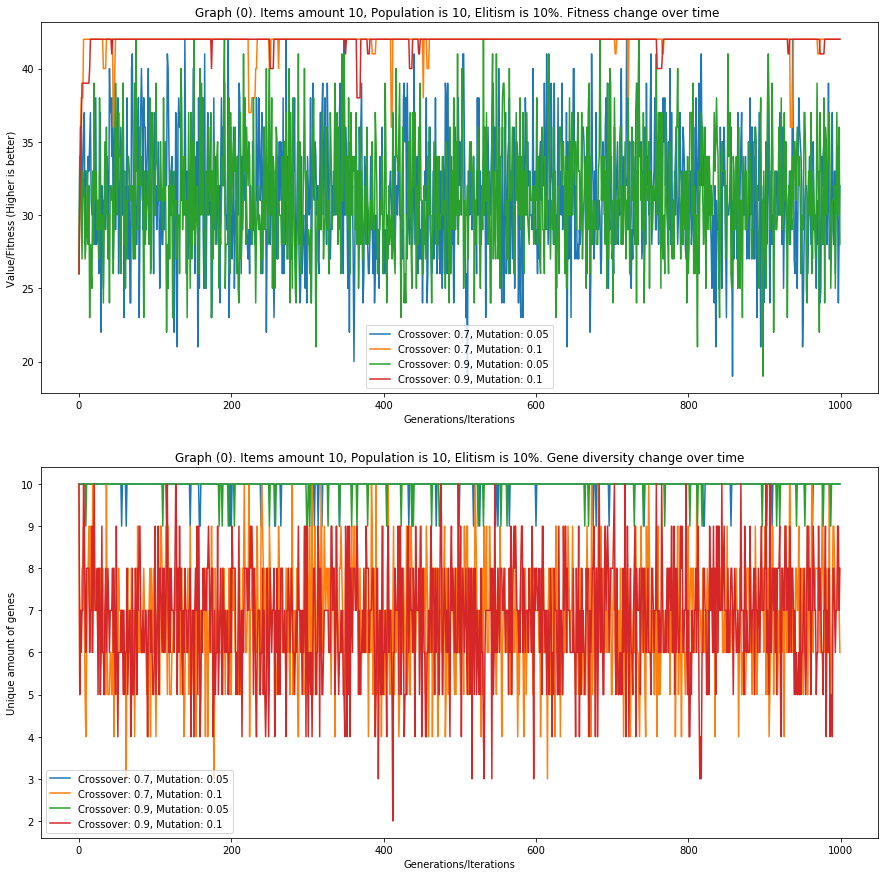

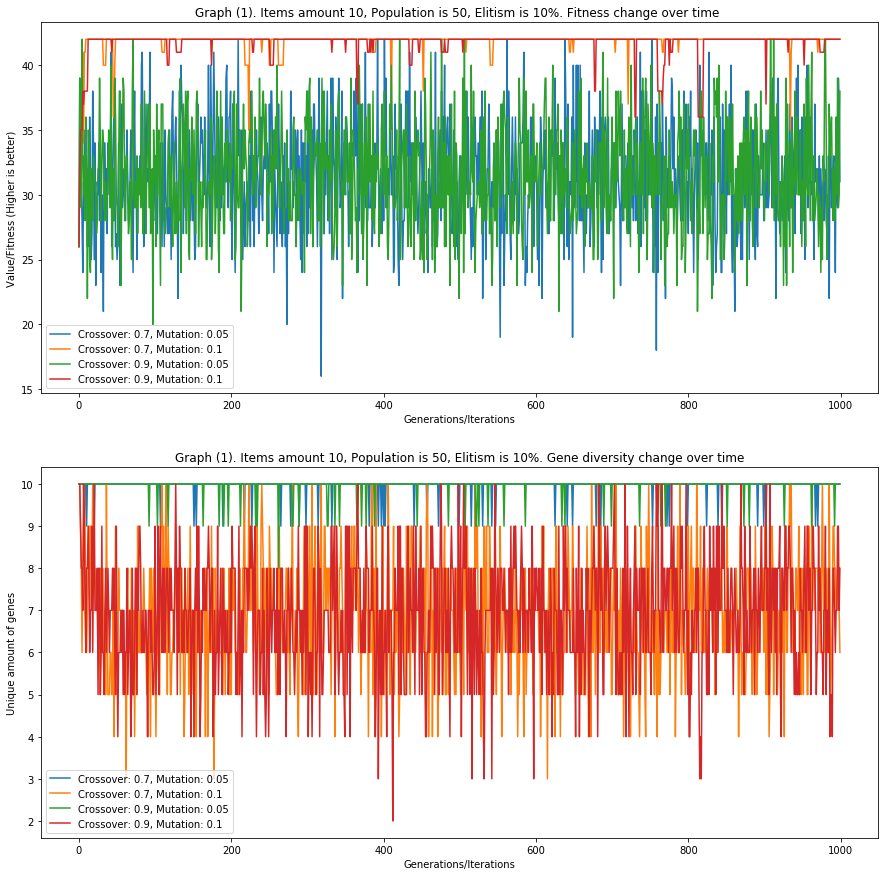

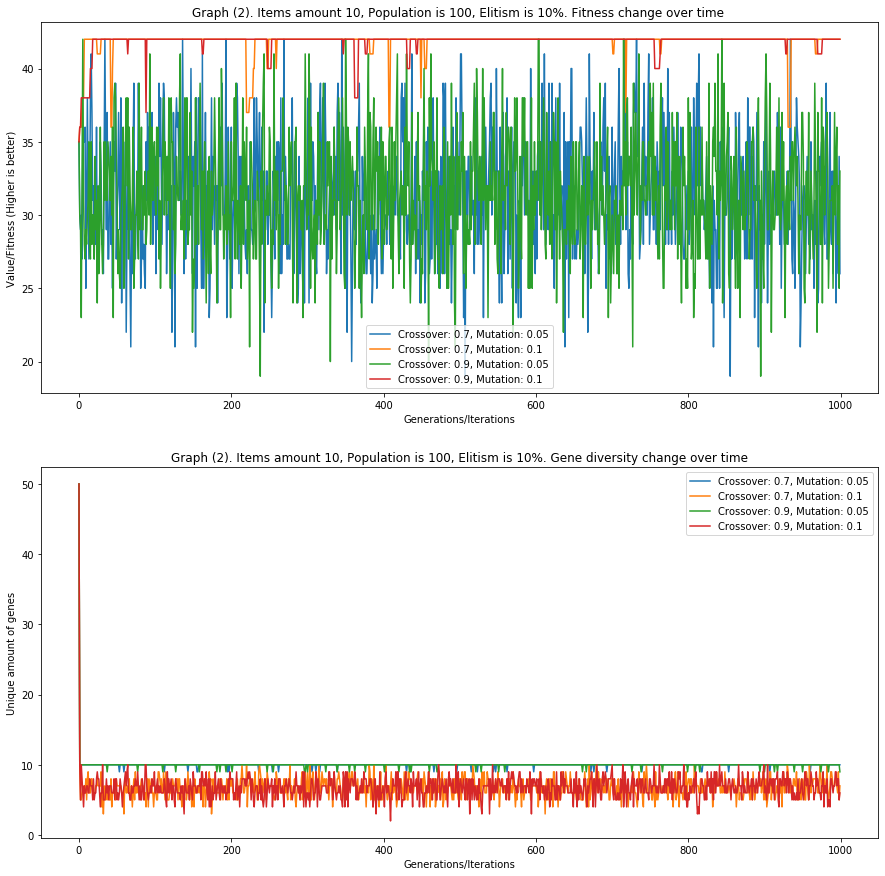

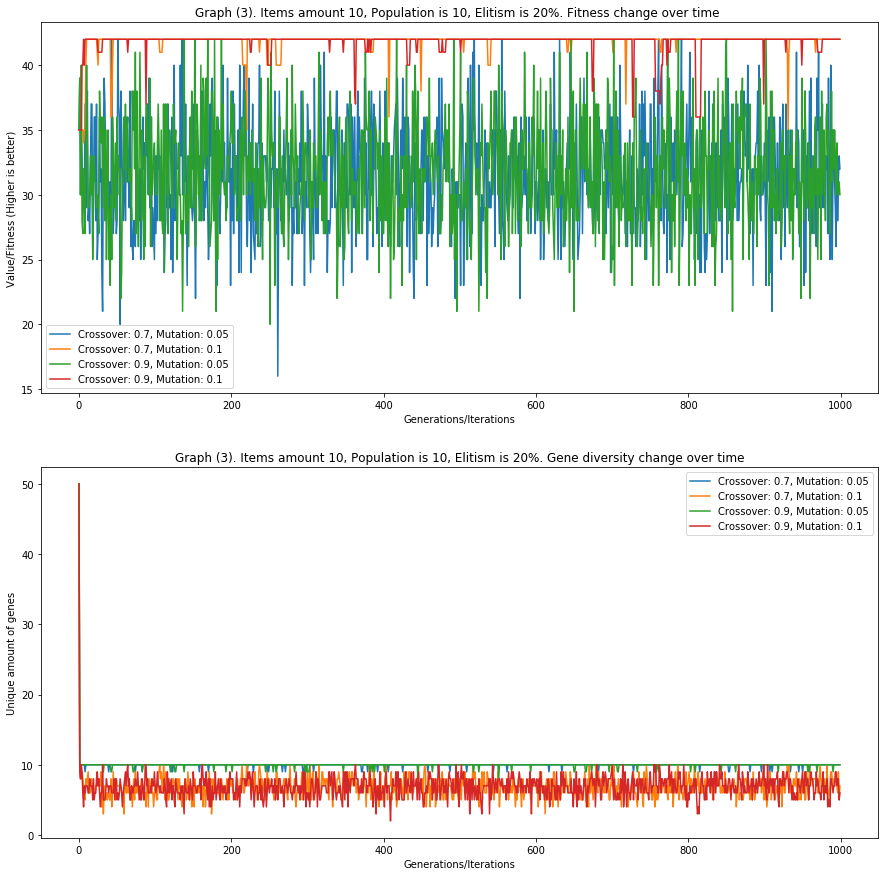

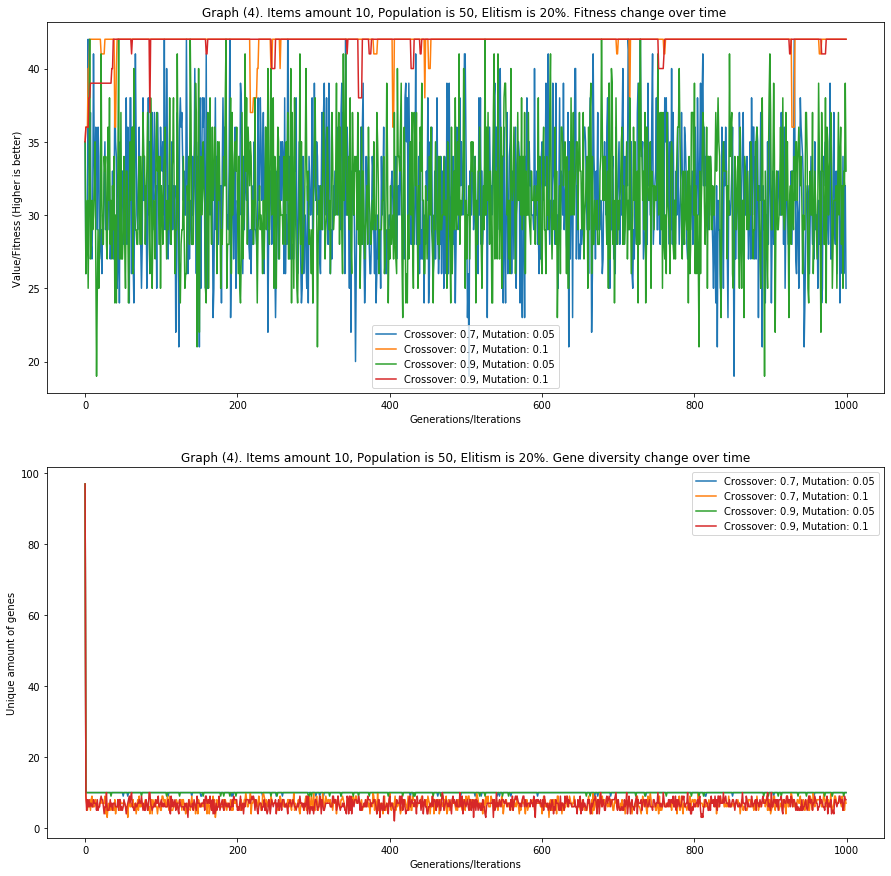

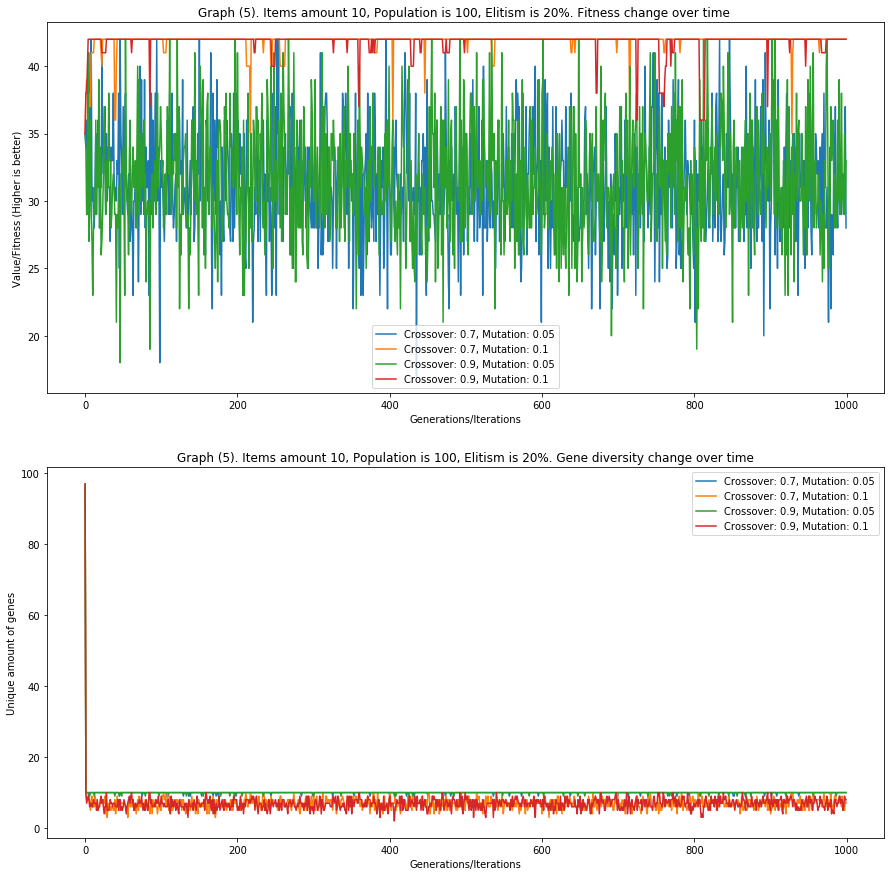

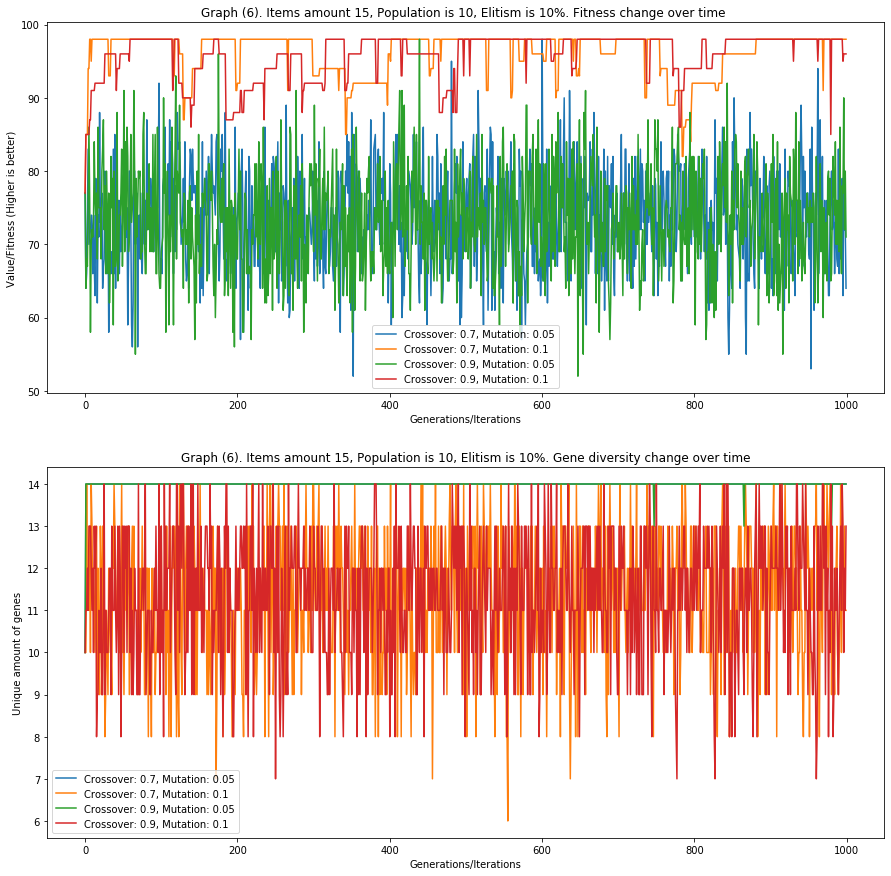

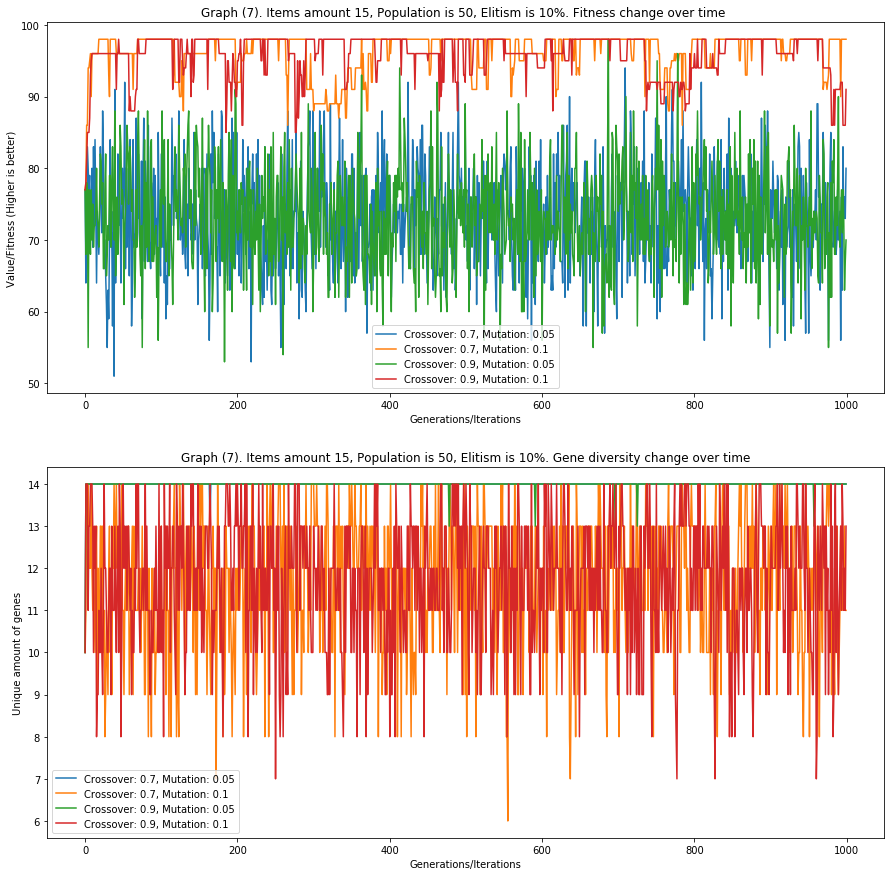

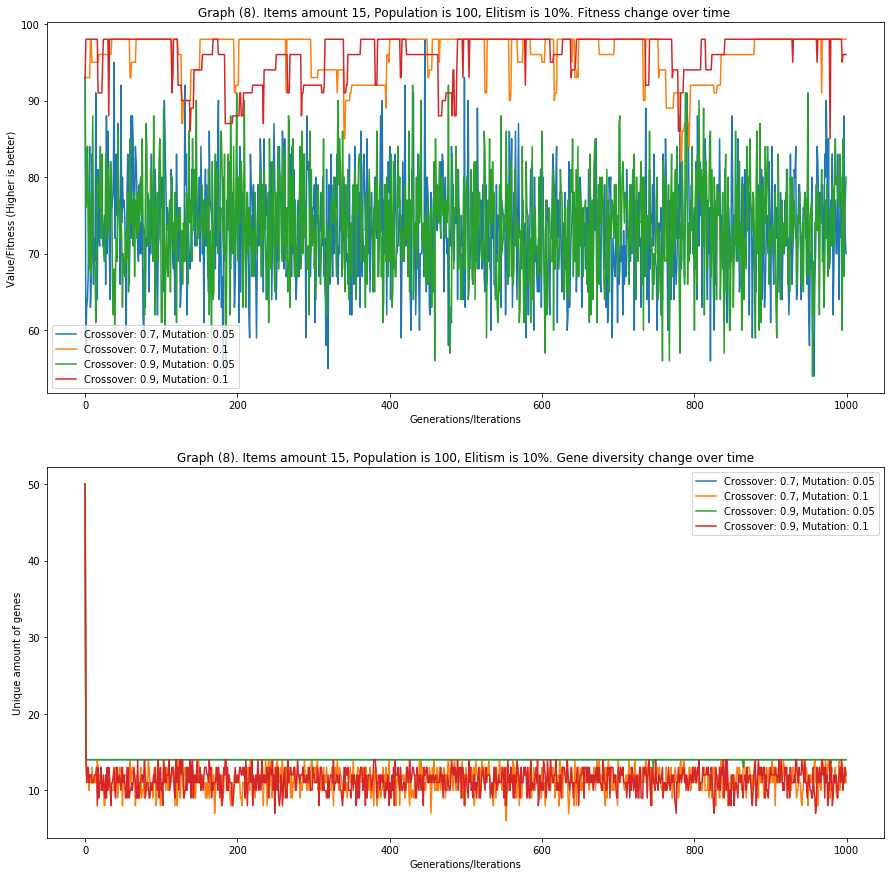

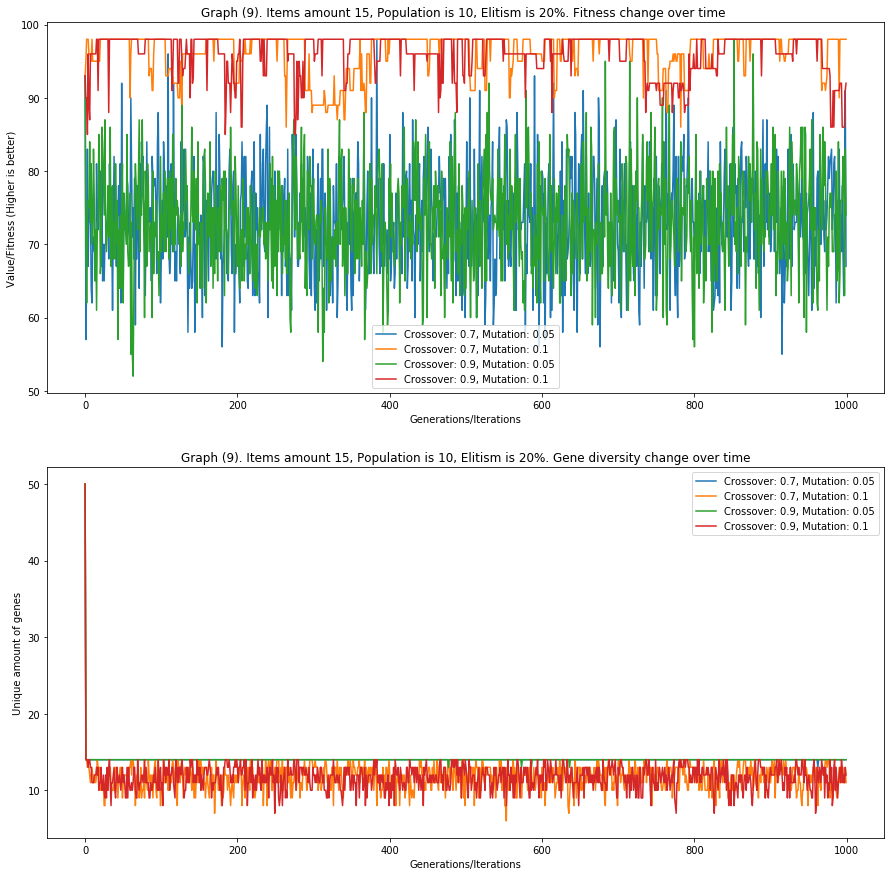

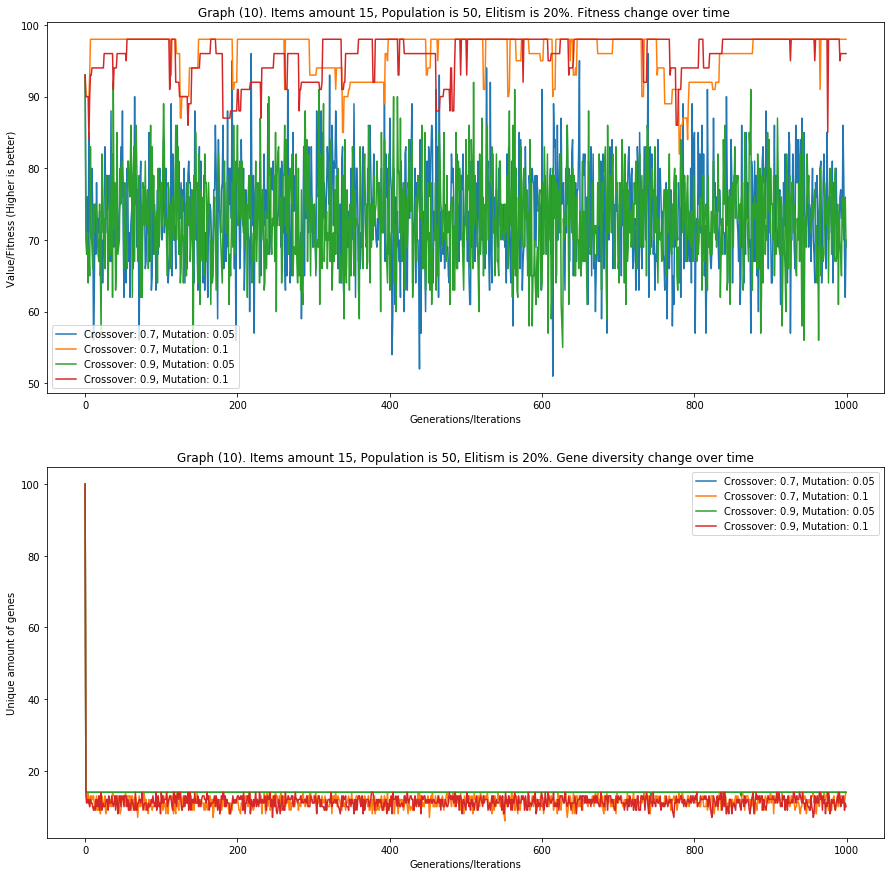

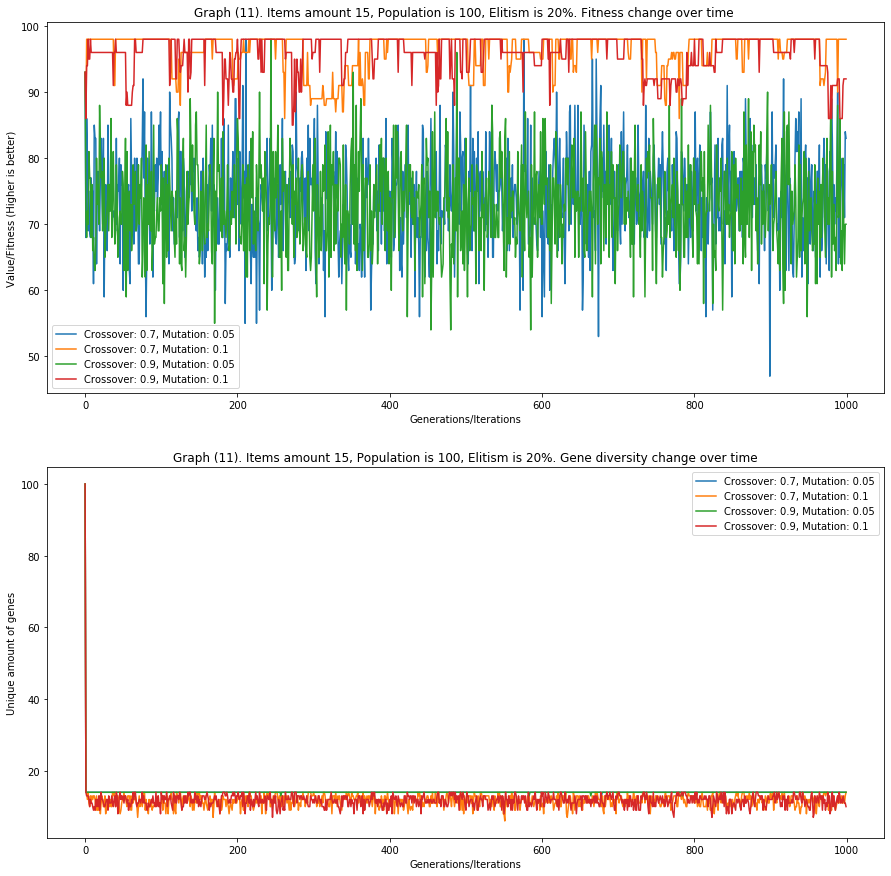

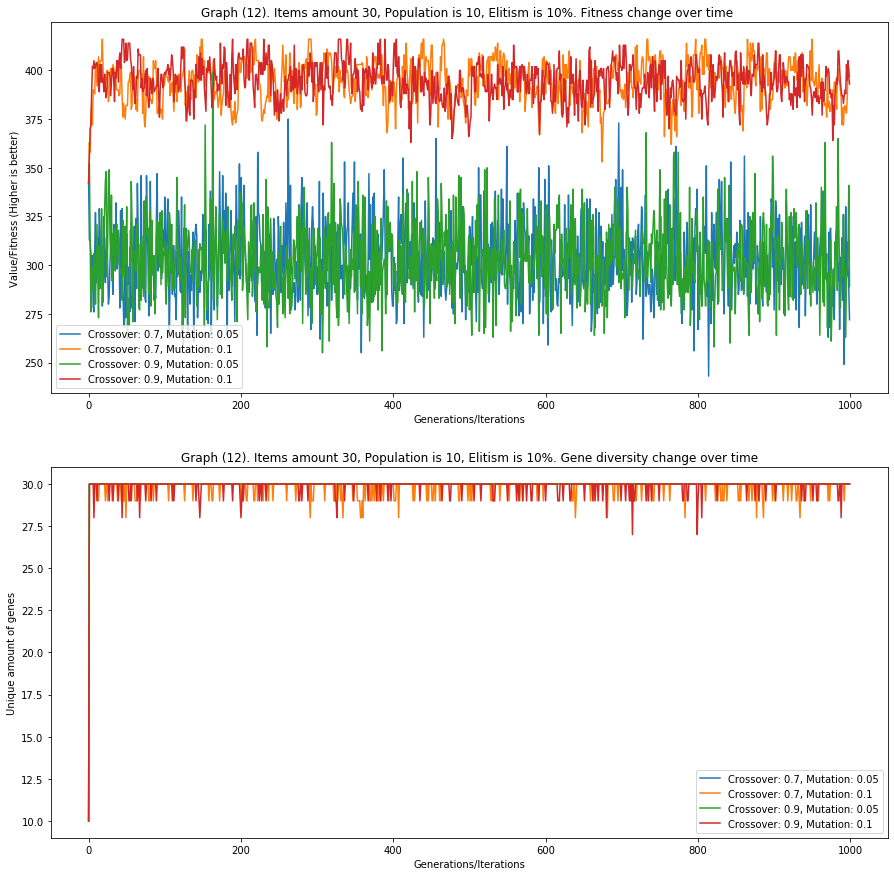

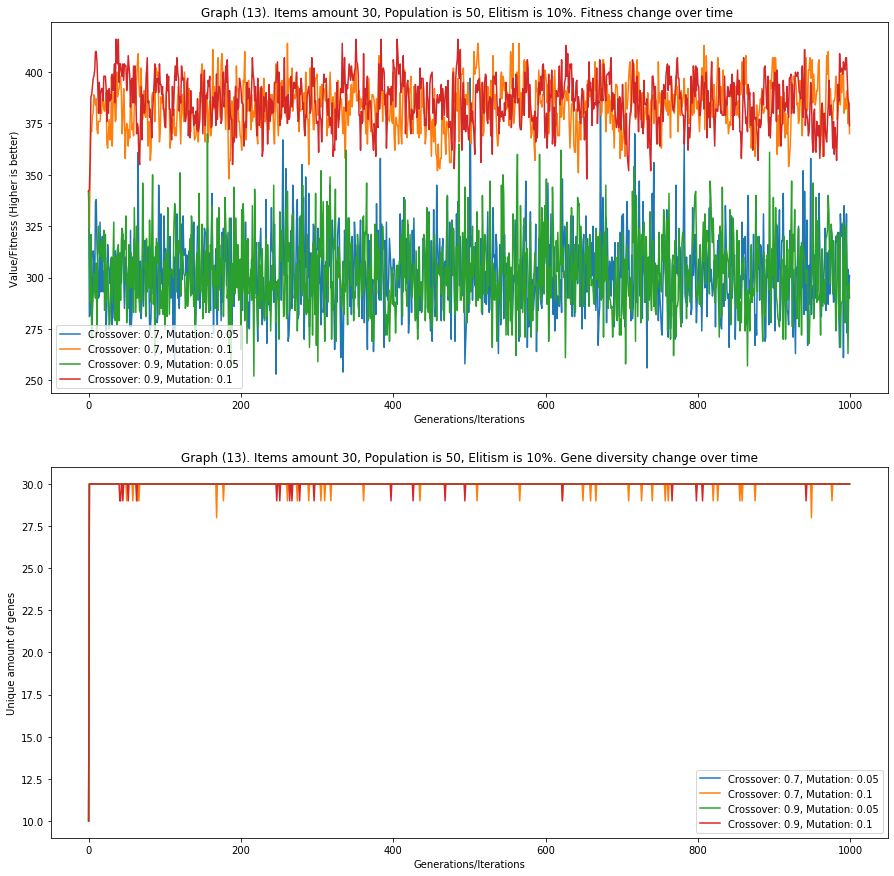

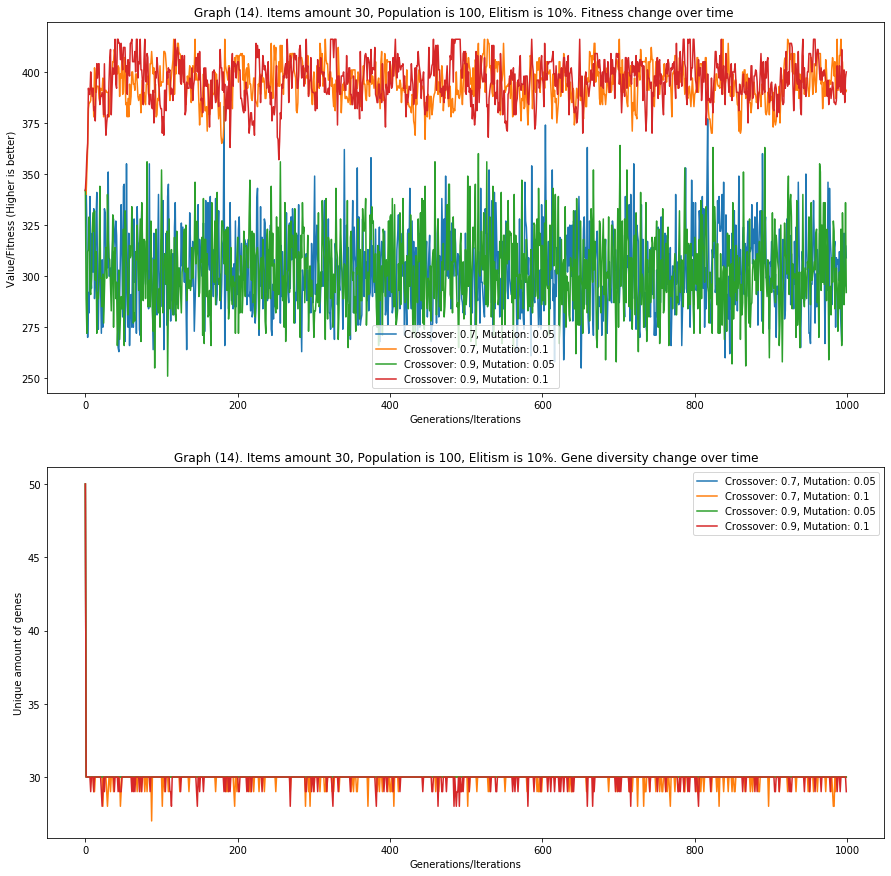

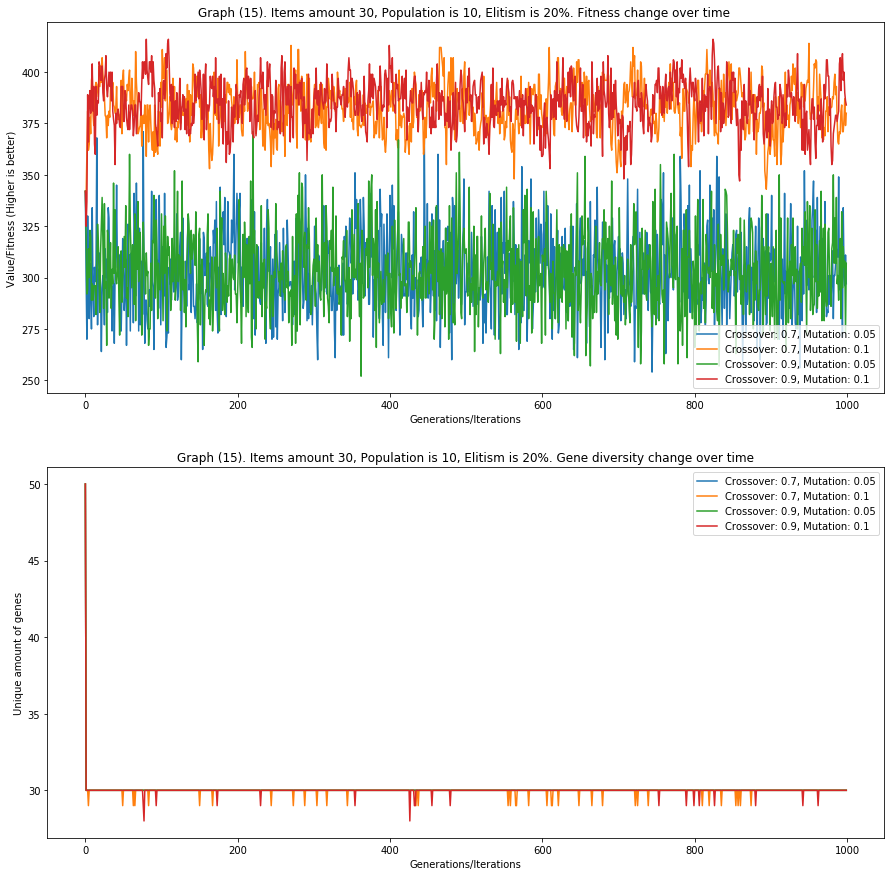

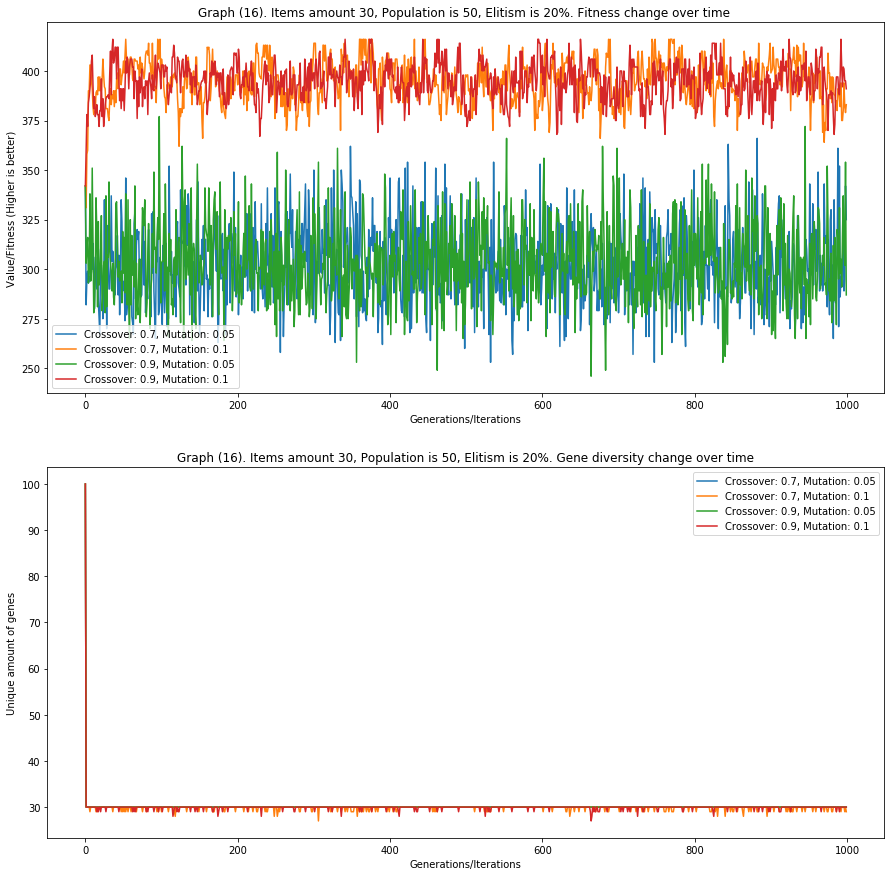

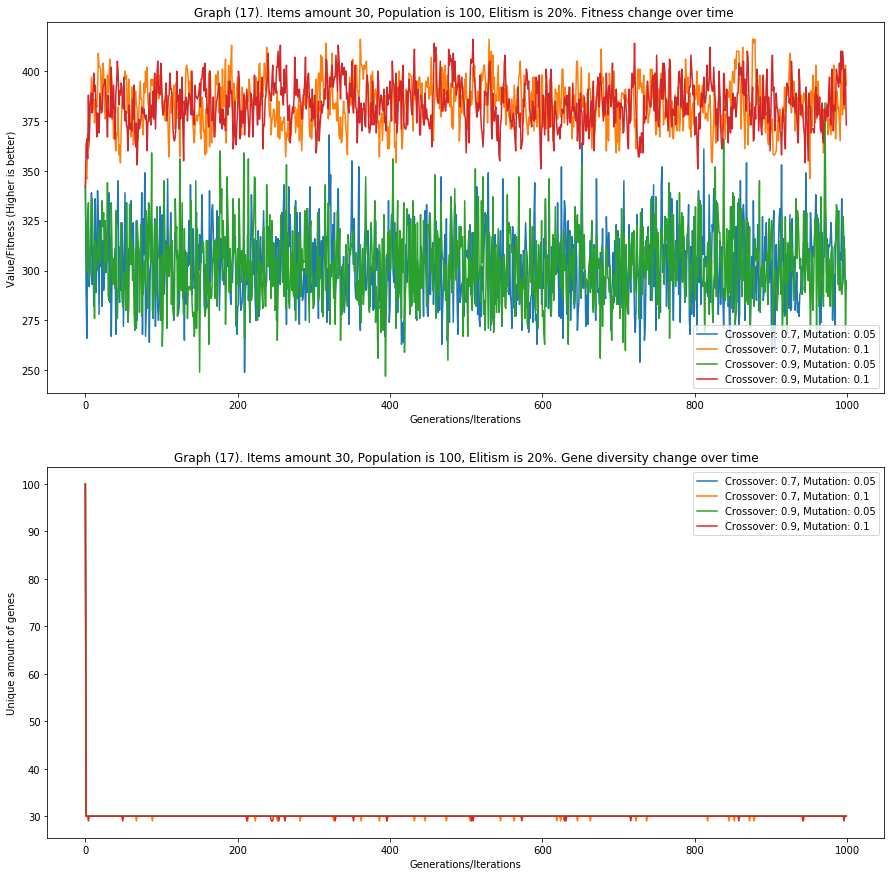

In [14]:
import json
def read_experiments(filename = 'Knapsack_experiments_1000.json'):
    with open(filename) as json_file:
        experiments = json.load(json_file)
    return experiments
experiments_json = read_experiments()
# experiments_json = create_experiments() #For custom experiments look at create_experiments()
plot_experiments(experiments_json)